# more extraction - low priority

In [142]:
import BCI_analysis
import pandas as pd

In [ ]:
# write a script to extract the motion energy of the pixels inside the nose-jaw-eye delineated rectangle - to include whisker pad but exclude moving lickport

# regression

In [ ]:
#Import necessary libraries - should work mostly from BCI_analysis + matplotlib + numpy
from BCI_analysis.pipeline import pipeline_regression
importlib.reload(pipeline_regression)
import os
import importlib

In [ ]:
# define base directories, if necessary
# define subject/FOV/session/
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"

In [185]:
# match calcium imaging frames with DLC frames, extract all data in a nice structure
# it doesn't have to have the actual calcium traces, the frame indices are enough, since we'll select the calcium traces in a next step, since probably this cell will be the slowest
# should have the option for averaging/std calculation on variable windows, then downsampling
# should have the option for excluding post-reward activity
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)
print(dict_aligned.keys())
DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
F = np.concatenate(dict_aligned['F_aligned'], axis=1)

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy
dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])
Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:30<00:00, 29.06it/s]


<AxesSubplot:>

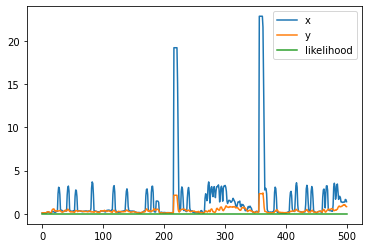

In [202]:
DLC_aligned["Lickport"][:500].plot()

In [194]:
scores, beta, intercept = pipeline_regression.linear_regression(F, DLC_aligned)

Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:28<00:00, 30.88it/s]


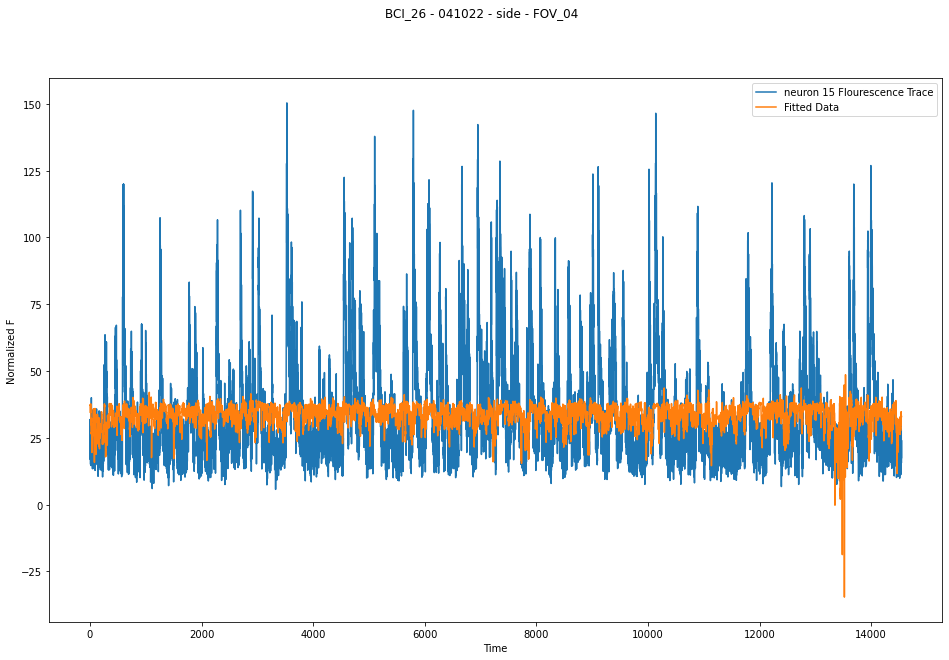

In [182]:
cn = dict_aligned['cn']
def plot_regression(neuron=cn):
    _, ax = plt.subplots(1, 1, figsize=(16,10))
    plt.suptitle(f"{mouse} - {session} - {camera} - {FOV}")
    ax.plot(F[neuron, :], label=f'neuron {neuron} Flourescence Trace')
    ax.plot((beta[neuron]@DLC_aligned.T) + intercept[neuron], label='Fitted Data')
    # ax[0,0].set_title(f'{end-start} timepoints, score {scores[cn]:0.2f}')
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized F")
    ax.legend()
    plt.plot()
plot_regression(cn)

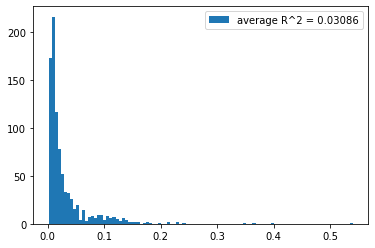

In [183]:
plt.hist(scores, bins=100, label=f'average R^2 = {np.mean(scores):0.5f}')
plt.legend()
plt.show()

In [2]:
# select neurons to predict based on their activity - e.g. exclude cells that have low activity, or include cells that have bit movement-triggered averages, and whatnot - Marton can do this

In [ ]:
# predict the activity of the selected neurons from DLC data

# Comparison of day-to-day movements

In [184]:
# extract reward-triggered and go-cue triggered movements of a mouse for ALL sessions
import os
import importlib
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)

# function1: dict_aligned should also have the moving standard deviation and then downsample it. (Paint)
#            Also make sure to have the flouroscence indices.        
# function2: align at some point

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:20<00:00, 43.11it/s]


In [ ]:
# train a classifier to predict the session ID based on the movements. Can we do it?

# classify single trials with many parameters, if we look at single movements its easier to do it. 
## to focus on sessions that the mouse mightve learnt with movements. 

# look at behavior after the reward vs before the reward. 
# look at trial to trial data. 

#
#
#      Speed (root(vx^2 + vy^2))
#     (moving standard devations)  ----> Random Forest ----> 
#         ------reward------
#
#

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = DLC_aligned
y = data['session ID']

clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

